gen = ImageDataGenerator()
 
Automatically generates data in batches

Data augmentation (shifting, rotation, flipping, …)

Preprocessing (via preprocess_input)

generator = gen.flow_from_directory()

Specify target image size (e.g. resize all images to be 224 x 224), batch size

model.fit_generator(generator)

Used in place of model.fit(X, Y)


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys,os

In [2]:
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('archive_unizpped')  # Replace with the path where you want to extract the files


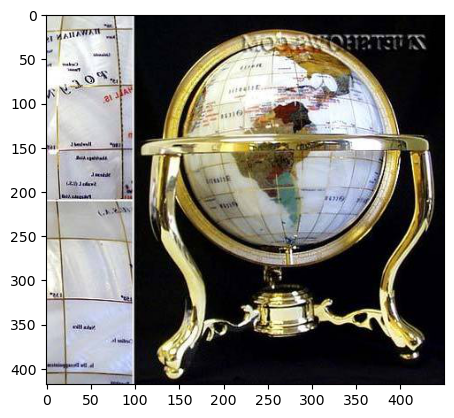

In [3]:
plt.imshow(image.load_img('archive_unizpped/training/non_food/888.jpg'))
plt.show()

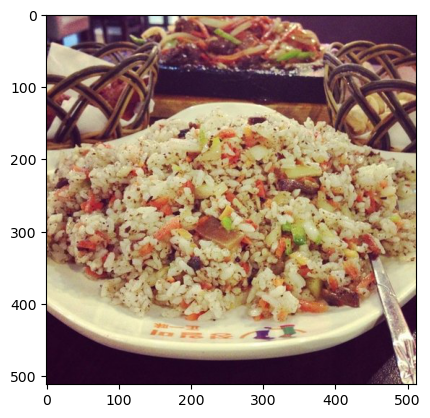

In [4]:
plt.imshow(image.load_img('archive_unizpped/training/food/915.jpg'))
plt.show()

In [10]:
train_path = 'archive_unizpped/training'
valid_path = 'archive_unizpped/validation'


In [11]:
IMAGE_SIZE = [200,200]

In [12]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [13]:
folders = glob(train_path+ '/*')
folders

['archive_unizpped/training\\food', 'archive_unizpped/training\\non_food']

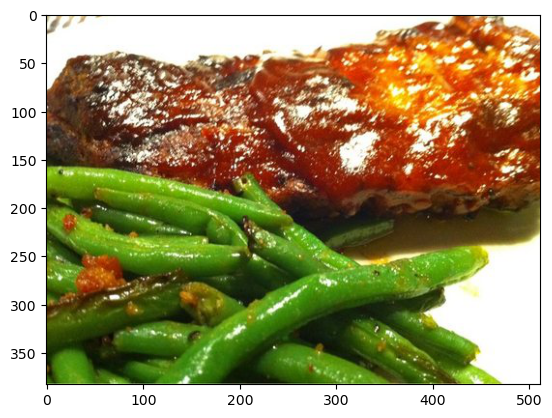

In [14]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [16]:
ptm = PretrainedModel(
    input_shape = IMAGE_SIZE + [3],
    weights = 'imagenet',
    include_top = False,
)

In [17]:
x = Flatten()(ptm.output)

In [18]:
model = Model(inputs =ptm.input, outputs =x)

In [19]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 200, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 100, 100, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 100, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 50, 50, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 25, 25, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [21]:
batch_size = 128

# Create generator for training data
train_generator = gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,  
    batch_size=batch_size,
    class_mode ='binary',
)
valid_generator = gen.flow_from_directory(
    valid_path,
    target_size =IMAGE_SIZE,
    batch_size =batch_size,
    class_mode ='binary',
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
Ntrain = len(image_files)
Nvalid = len(valid_image_files)

feat = model.predict(np.random.random([1]+IMAGE_SIZE +[3]))
D = feat.shape[1]

X_train = np.zeros((Ntrain,D))
Y_train = np.zeros(Ntrain)
X_valid = np.zeros((Nvalid,D))
Y_valid = np.zeros((Nvalid))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


In [24]:
# populate X_train and Y_train
i =0
for x, y in train_generator:
    # get features
    features = model.predict(x)
    # size of the batch (may not always be batch_size)
    sz = len(y)
    
    # assign to X_train and Y_train
    X_train[i:i + sz] = features
    Y_train[i:i + sz] = y
    
    i+= sz
    print(i)
    
    if i >= Ntrain:
        print('breaking now')
        break
    print(i)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
128
128
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
256
256
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
384
384
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
512
512
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
640
640
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
768
768
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
896
896
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
1024
1024
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
1152
1152
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
1280
1280
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
1408
1408
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
1536
1536
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
1664
1664
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
1792
1792
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
1920
1920
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2048
2048
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2176
2176
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2304
2304
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
2432
2432
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2560
2560
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
2688
2688
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2816
2816
4/

In [25]:
# populate X_train and Y_train
i =0
for x, y in valid_generator:
    # get features
    features = model.predict(x)
    # size of the batch (may not always be batch_size)
    sz = len(y)
    
    # assign to X_train and Y_train
    X_valid[i:i + sz] = features
    Y_valid[i:i + sz] = y
    
    i+= sz
    print(i)
    
    if i >= Nvalid:
        print('breaking now')
        break
    print(i)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
128
128
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
256
256
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
384
384
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
512
512
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
640
640
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
768
768
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
896
896
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 830ms/step
1000
breaking now


In [26]:
X_train.max(), X_train.min()

(650.826416015625, 0.0)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_valid2 = scaler.transform(X_valid)

In [30]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train2, Y_train)
print(logr.score(X_train2, Y_train))
print(logr.score(X_valid2, Y_valid))

1.0
0.979


In [31]:
i = Input(shape=(D,))
x = Dense(1, activation ='sigmoid')(i)
linearmodel = Model(i,x)

In [39]:
linearmodel.compile(
    loss='binary_crossentropy',
    optimizer ='adam',
    metrics=['accuracy'],
)

In [40]:
r = linearmodel.fit(
    X_train, Y_train,
    batch_size =128,
    epochs=10,
    validation_data= (X_valid, Y_valid),
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7761 - loss: 3.7128 - val_accuracy: 0.9530 - val_loss: 1.0176
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.1412 - val_accuracy: 0.9810 - val_loss: 0.3449
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9990 - loss: 0.0072 - val_accuracy: 0.9780 - val_loss: 0.3598
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.1648e-05 - val_accuracy: 0.9790 - val_loss: 0.3511
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.4485e-05 - val_accuracy: 0.9790 - val_loss: 0.3511
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.5442e-06 - val_accuracy: 0.9790 - val_loss: 0.3514
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 6.9298e-06 - val_accuracy: 0.9790 - val_loss: 0.3521
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.3371e-06 - val_accurac

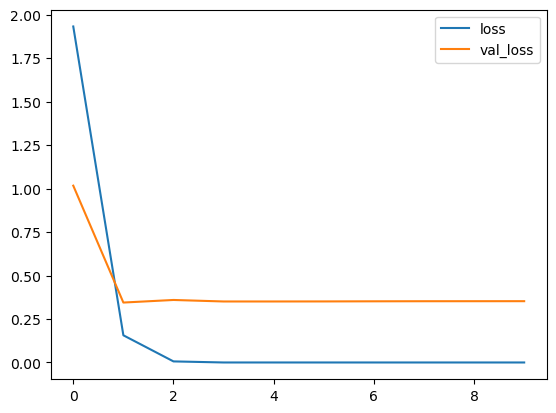

In [41]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

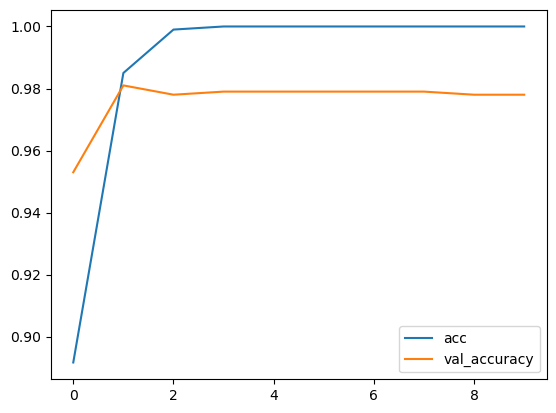

In [42]:
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()